- 어떤 규칙을 하나의 트기(tree) 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결하는 알고리즘
- 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델중 직관적이고 가장 실용성이 놓은 모델중 하니
- scikit-learn의 tree중에 서브모듈에 DecisionTreeClassifier() = 분류 

# 로지스틱 회귀로 와인 분류하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## ggplot 스타일
mpl.style.use('ggplot')
# matplotlib 한글화
mpl.rcParams['font.family'] = 'D2coding'

https://githubusercontent.com/rickiepark/hg-mldl/master/wine/csv

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [3]:
wine.sample(10)

,alcohol,sugar,pH,class
6429,11.1,1.6,3.23,1.0
5532,11.0,5.6,2.96,1.0
939,11.4,1.6,3.61,0.0
5635,9.9,1.4,3.14,1.0
3901,9.0,7.0,3.21,1.0
1082,9.5,1.8,3.42,0.0
2414,9.0,2.8,3.01,1.0
1133,11.2,5.5,3.37,0.0
6409,9.1,3.3,3.42,1.0
310,9.3,2.5,3.12,0.0


In [4]:
wine.shape

(6497, 4)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
wine['class'].unique()

array([0., 1.])

In [8]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [9]:
wine_input = wine[['alcohol','sugar','pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [10]:
wine_target

array([0., 0., 0., ..., 1., 1., 1.])

In [11]:
wine_input.shape, wine_target.shape

((6497, 3), (6497,))

# 훈련 세트와 테스트 세트로 분리

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    wine_input, wine_target, test_size = 0.2, random_state = 42) 

In [13]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [14]:
test_target

array([1., 0., 1., ..., 1., 1., 1.])

## 피처 스캐일링

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀 모델 구축하기

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 디폴트 = 1
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [18]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [19]:
pd.value_counts(lr.predict(train_scaled))

1.0    4450
0.0     747
dtype: int64

In [20]:
lr.predict_proba(train_scaled)

array([[0.06189333, 0.93810667],
       [0.21742616, 0.78257384],
       [0.40703571, 0.59296429],
       ...,
       [0.20751956, 0.79248044],
       [0.08048173, 0.91951827],
       [0.69744416, 0.30255584]])

In [21]:
decisions = lr.decision_function(train_scaled[:10])
decisions

array([ 2.71845124,  1.28072898,  0.37623326,  0.19151687,  5.23322944,
       -0.25075351,  0.9334123 ,  0.42009103,  0.12669517,  2.2138284 ])

In [22]:
from scipy.special import expit

print(expit(decisions))
print(1 - expit(decisions))

[0.93810667 0.78257384 0.59296429 0.54773341 0.99469206 0.43763804
 0.71776705 0.60350503 0.53163149 0.90148445]
[0.06189333 0.21742616 0.40703571 0.45226659 0.00530794 0.56236196
 0.28223295 0.39649497 0.46836851 0.09851555]


Text(0.5, 1.0, '시그모이드 시각화')

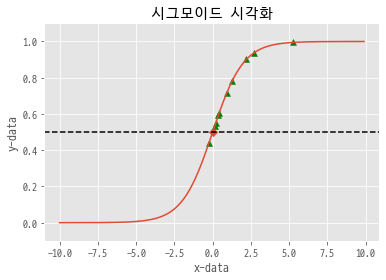

In [23]:
def simoid(x):
    return 1 / (1 + np.exp(-x))

x_data = np.arange(-10, 10, 0.1)
y_data = simoid(x_data)

plt.plot(x_data, y_data)
plt.scatter(0, 0.5, marker='D')
plt.scatter(decisions, expit(decisions),marker='^' ,color = 'g')
plt.axhline(0.5, 0, 1, color = 'black', linestyle = '--')
plt.ylim(-0.1, 1.1)
plt.xlabel('x-data')
plt.ylabel('y-data')
plt.title('시그모이드 시각화')

## 의사결정 나무

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


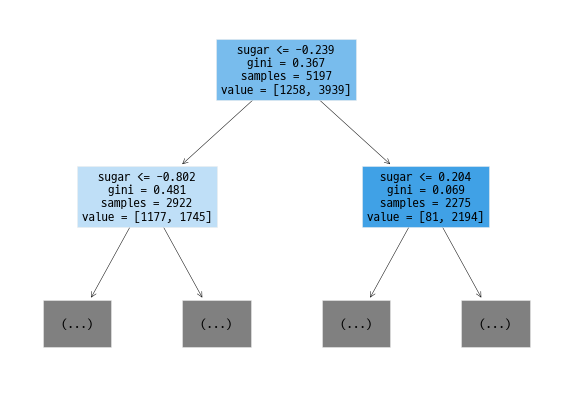

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 7))
#            최대레 벨수(가지치기 파라메터)
plot_tree(dt, max_depth=1, filled=True, feature_names = ['alcohol','sugar','pH'])
plt.show()

# 1-(음성클래스의 비율의 제곱 + 양성클래스의 비율의 제곱)

- 지니 불순도 : 1-{(음성클래스의 비율)<sup>2</sup> + (양성클래스의 비율)<sup>2</sup>}

In [26]:
# 루트의 지니불순도
1 - ((1258/5197)**2 + (3939/5197)**2)

0.3669367279393918

In [27]:
(1 - ((1177/2922)**2 + (1745/2922)**2))

0.481106768216382

In [28]:
1 - ((1258/5197)**2 + (3939/5197)**2) - (1 - ((1177/2922)**2 + (1745/2922)**2))

-0.11417004027699018

In [29]:
# Pruning(가지치기) 비용함수, 적절하게 치는 것이 비용복잡도이다
# 트리의 깊이 깊을 수록 과대적합됨
# 가지치기 어디에서 치는지 비용함수라고 함


## 가지치기(pruning)
- 최대 트리로 형성된 결정 트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높이는 것
- 과적합을 막기위해 사용된다
- 더 많은 가지가 생기지 않도록 최대 깊이, leaf 노드의 최대개수, 한 노드가 분할하기 위한 최소 데이터 수를 제한 한다

In [30]:
#                          훈련 데이터 줄어짐
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


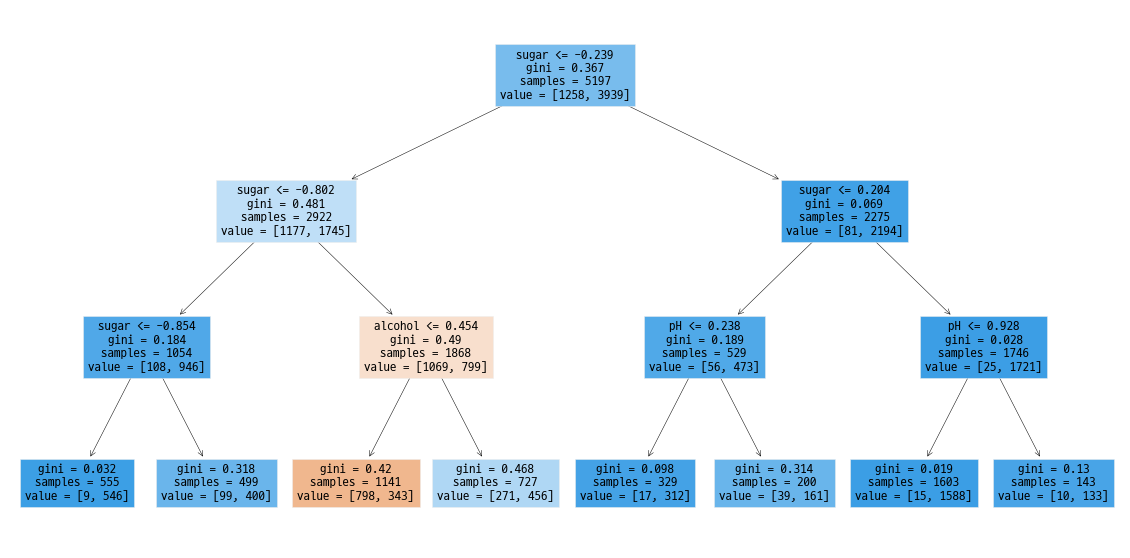

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 10))
#            최대레 벨수(가지치기 파라메터)
plot_tree(dt, filled=True, feature_names = ['alcohol','sugar','pH'])
plt.show()

# 1-(음성클래스의 비율의 제곱 + 양성클래스의 비율의 제곱)


# sugar 마이너스 나옴
# 불순도 기준으로 하기 때문에 전처리할 필요없음
# 하지만 우리는 전처리 데이터를 가지고 했음

In [32]:
#                          훈련 데이터 줄어짐
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


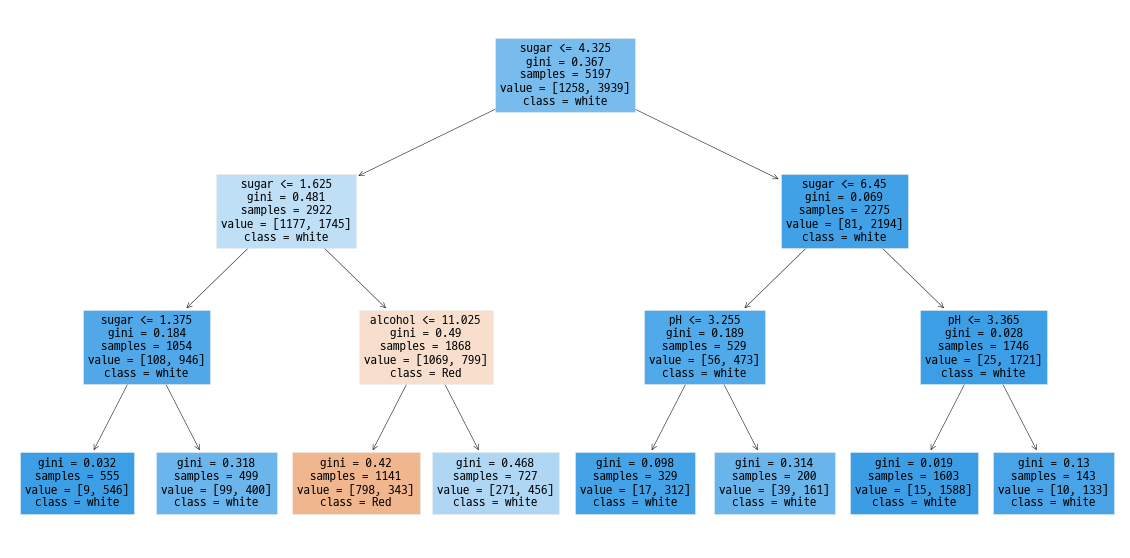

In [33]:
plt.figure(figsize = (20, 10))
#            최대레 벨수(가지치기 파라메터)
plot_tree(dt, filled=True, feature_names = ['alcohol','sugar','pH'], class_names=['Red', 'white'])
plt.show()

# 특성 중요도
# 결정 트리가 어떤 특성이 가장 중요한지 계산할 때 사용하는 결정트리

In [34]:
dt.classes_

array([0., 1.])

In [35]:
# 결정 트리가 어떤 특성이 가장 중요한지 계산할 때 사용하는 결정트리
# 특성 중요도 : 결정트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해 준다.

dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

In [36]:
# 특성 중요도 : 결정트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해 준다.
print('특성 중요도 - alcohol : {:.3f}, sugar : {:.3f}, pH : {:.3f}'.format(
    dt.feature_importances_[0], dt.feature_importances_[1], dt.feature_importances_[2]))

특성 중요도 - alcohol : 0.123, sugar : 0.869, pH : 0.008


In [37]:
class_names=['0', '1']

### 그리드 서치

In [58]:
gs = DecisionTreeClassifier(max_depth = 3, random_state=42)
gs.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8901289205310756
0.8607692307692307


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 2020)

params = {
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10]
}
#                                             폴더수
gs = GridSearchCV(model, param_grid = params, cv = 10, refit=True, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [70]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.8654961464354528


In [71]:
model = gs.best_estimator_
print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.8949393881085241
0.8553846153846154


In [77]:
model = DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 9, min_samples_split= 2, random_state=42)
model.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8901289205310756
0.8607692307692307


In [87]:
a = open('breast-cancer.data', 'r', encoding = 'UTF8')
strlist = a.readlines()
for i in strlist:
    print(i)

no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no

no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no

no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no

no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no

no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no

no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no

no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no

no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no

no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no

no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no

no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no

no-recurrence-events,50-59,ge40,25-29,0-2,no,2,left,left_low,no

no-recurrence-events,60-69,lt40,10-14,0-2,no,1,left,right_up,no

no-recurrence-events,50-59,ge40,25-29,0-2,no,3,left,right_up,no

no-recurrence-events,40-49,premeno,30-34,0-2,no,3,left,left_up,no

n